/home/cho134/.local/lib/python3.9/site-packages/cupy/_environment.py:434: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy, cupy-cuda110

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


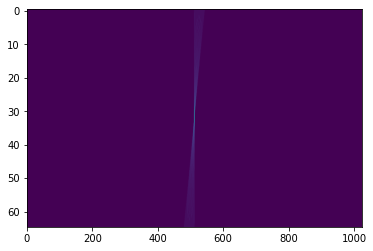

In [1]:
import cupy as cp
import numpy as np
from astropy import units as u
import hyperseti
import pylab as plt
%matplotlib inline

test_data = np.ones(shape=(32, 1, 1024), dtype='float32')
test_data[:, :, 511] = 10

metadata_in = {'frequency_start': 1000*u.MHz, 
            'time_step': 1.0*u.s, 
            'frequency_step': 4.0*u.Hz}

dedopp, metadata = hyperseti.dedoppler(test_data, metadata_in, boxcar_size=1,
                             max_dd=4.0, return_space='cpu')

plt.imshow(dedopp.data.squeeze(), aspect='auto')

In [2]:
#! yes|pip uninstall hyperseti

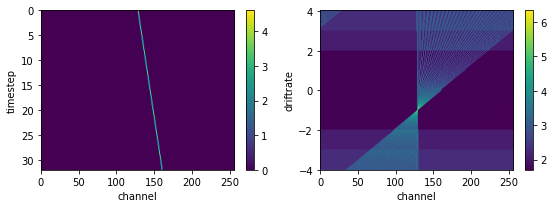

In [3]:
import numpy as np
import astropy.units as u
import pylab as plt
from hyperseti import dedoppler
from hyperseti import plotting 

# Create a drifting test signal
N_timestep, N_chans = 32, 256
test_data = np.ones(shape=(N_timestep, 1, N_chans ), dtype='float32')
for ii in range(N_timestep):
    test_data[ii, 0, N_chans // 2 + ii] = 100

# Create basic metadata
metadata = {'frequency_start': 1000*u.MHz, 'time_step': 1.0*u.s, 'frequency_step': 1.0*u.Hz}

# Run dedoppler
dedopp, metadata= dedoppler(test_data, metadata, boxcar_size=1, max_dd=4.0)

# Imshow output
plt.figure(figsize=(8, 3))
plt.subplot(1,2,1)
plotting.imshow_waterfall(np.log(test_data), metadata)
plt.subplot(1,2,2)
plotting.imshow_dedopp(np.log(dedopp), metadata)
plt.tight_layout()
